In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
import os
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
def scaler_data(data, type_scaler):

    scaler = None
    if type_scaler == 1:
        scaler = StandardScaler()
    elif type_scaler == 2:
        scaler = MinMaxScaler()
    elif type_scaler == 3:
        scaler = MaxAbsScaler()
    else:
        scaler = RobustScaler()
    
    scaler.fit(data)
    return scaler

In [6]:
df_data = pd.read_csv("data_with_null_processed.csv")

response = df_data["label_gdm"].values
df_values = df_data.drop(columns=["label_gdm"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_values, 
    response, 
    random_state=42,
    test_size=.2,
    stratify=response)

In [10]:
os.makedirs("divided_data", exist_ok=True)

In [12]:
X_test["label_gdm"] = y_test

In [13]:
X_test["label_gdm"].value_counts()

label_gdm
0    242
1     49
Name: count, dtype: int64

In [14]:
X_test.to_csv("divided_data/X_test.csv", index=False)

In [27]:
list_df_scalers = []

for index, option in enumerate(["StandardScaler", "MinMaxScaler", "MaxAbsScaler", "RobustScaler"]):
    
    print("Applying scaler: ", option)
    scaler = scaler_data(X_train, index+1)
    X_train_scaled = scaler.transform(X_train)

    X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
    X_train_scaled["label_gdm"] = y_train

    list_df_scalers.append((option, X_train_scaled.fillna(X_train_scaled.mean())))
    
    os.makedirs(option, exist_ok=True)
    X_train_scaled.to_csv(f"{option}/X_train_{option}.csv", index=False)
    dump(scaler, f"{option}/scaler_{option}.joblib")

Applying scaler:  StandardScaler
Applying scaler:  MinMaxScaler
Applying scaler:  MaxAbsScaler
Applying scaler:  RobustScaler


- Working with data visualization

StandardScaler
MinMaxScaler
MaxAbsScaler
RobustScaler


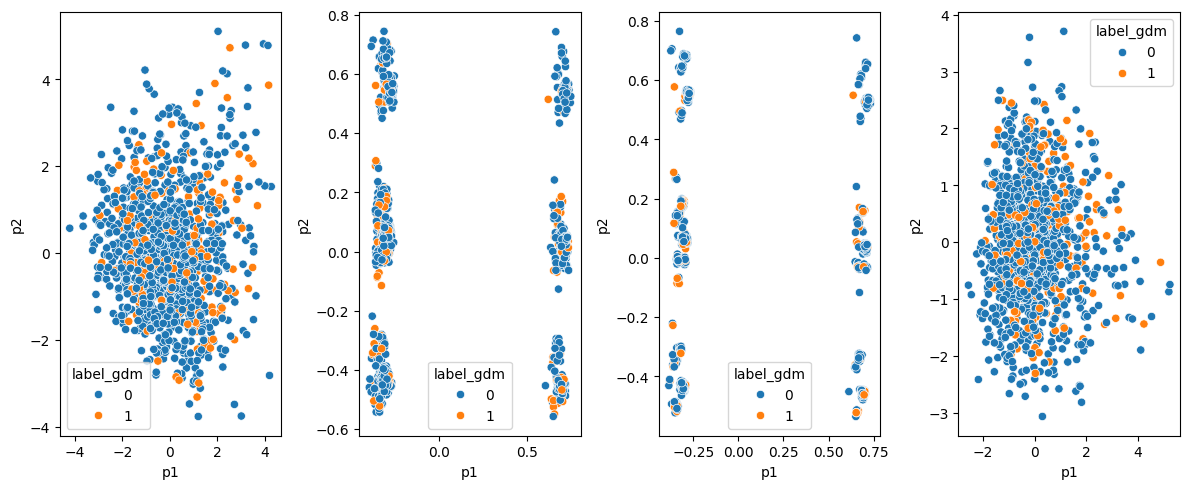

In [33]:
_, axis = plt.subplots(1, 4, figsize=(12, 5))

i=0
for element in list_df_scalers:
    print(element[0])
    pca_instance = PCA(n_components=2, random_state=42)
    data_transform = pca_instance.fit_transform(element[1].drop(columns="label_gdm"))
    data_transform = pd.DataFrame(data=data_transform, columns=["p1", "p2"])
    data_transform["label_gdm"] = element[1]["label_gdm"].values
    
    sns.scatterplot(data=data_transform, x="p1", y="p2", hue="label_gdm", ax=axis[i])
    i+=1

plt.tight_layout()


StandardScaler
MinMaxScaler
MaxAbsScaler
RobustScaler


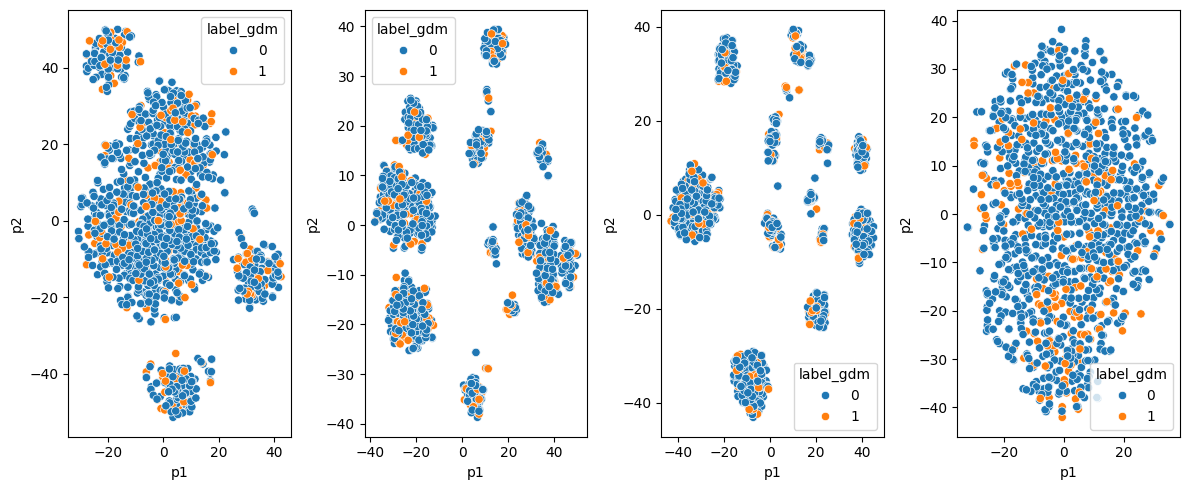

In [34]:
_, axis = plt.subplots(1, 4, figsize=(12, 5))

i=0
for element in list_df_scalers:
    print(element[0])
    tsne_instance = TSNE(n_components=2, random_state=42)
    data_transform = tsne_instance.fit_transform(element[1].drop(columns="label_gdm"))
    data_transform = pd.DataFrame(data=data_transform, columns=["p1", "p2"])
    data_transform["label_gdm"] = element[1]["label_gdm"].values
    
    sns.scatterplot(data=data_transform, x="p1", y="p2", hue="label_gdm", ax=axis[i])
    i+=1

plt.tight_layout()